# Standardization

Feature Scaling (Standardization) is a technique used in data preprocessing to normalize the range of independent features (input variables) in a dataset. It is especially important in machine learning algorithms that rely on distances (like KNN, SVM, or gradient descent-based models like logistic regression and neural networks).

## What is Standardization?
Standardization is one type of feature scaling where the features are rescaled so that they have:
Mean (μ) = 0
Standard deviation (σ) = 1

The formula for standardization is:  $z = \frac{x - \mu}{\sigma}$

Where:  
- x is the original value,
- μ is the mean of the feature,
- σ is the standard deviation of the feature,
- z is the standardized value.
## Why is Standardization Important?
1. Equal Treatment of Features: Features with larger scales can dominate the model if not scaled properly.
2. Faster Convergence: For gradient-based algorithms (like logistic regression, neural networks), it helps the model converge faster.
9. Improves Model Performance: Algorithms like SVMs and KNN rely on distance metrics, and unscaled features can skew distance calculations.
4.Regularization Works Better: Techniques like Lasso and Ridge regression are sensitive to the scale of features.

## When to Use Standardization?
When your data follows a Gaussian (normal) distribution.
When using algorithms sensitive to feature scale, such as:

1. Logistic Regression
2. SVM
3. K-Means
4. KNN
5. PCA (Principal Component Analysis)
6. Neural Networks

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("bank-loan.csv")
dataset.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
dataset.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_10868\2304962839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['income'])


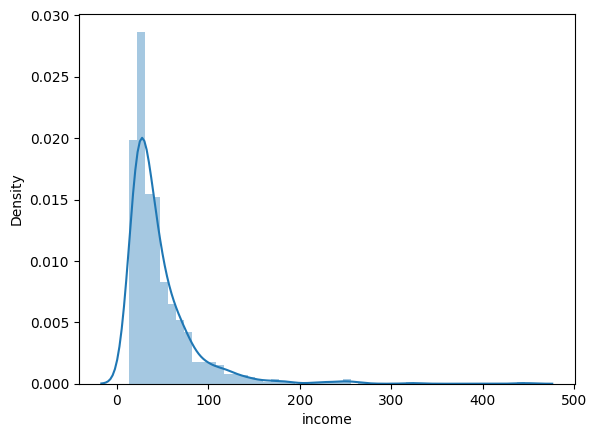

In [6]:
sns.distplot(dataset['income'])
plt.show()

In [7]:
dataset.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
ss.fit(dataset[['income']])

StandardScaler()

In [10]:
dataset['Income_new'] = pd.DataFrame(ss.transform(dataset[['income']]), columns=['Income_new'])


In [11]:
dataset.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Income_new
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,3.357307
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,-0.406935
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,0.216112
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,1.903530
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,-0.484816


In [12]:
dataset.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Income_new
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,8.500000e+02
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429,8.359326e-17
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727,1.000589e+00
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000,-8.742203e-01
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000,-5.886572e-01
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000,-3.030940e-01
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000,2.355820e-01
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000,1.036658e+01


C:\Users\User\AppData\Local\Temp\ipykernel_10868\4129440480.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['income'])
C:\Users\User\AppData\Local\Temp\ipykernel_10868\4129440480.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Income_new'])


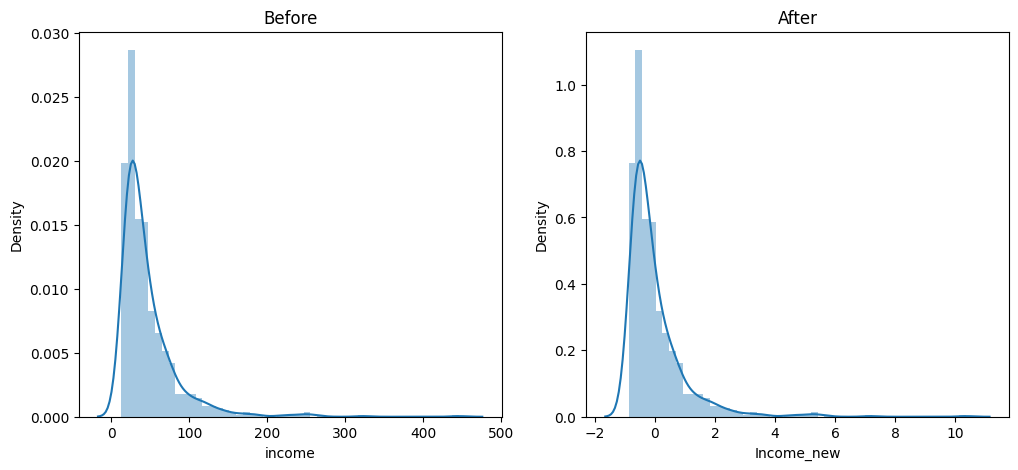

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['income'])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['Income_new'])

plt.show()

# Normalization

## What is Normalization?
Normalization, also known as Min-Max Scaling, is a technique that transforms features to a fixed range, usually [0, 1]. This helps models treat all features equally.
### Formula
$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

### Where:

- x = original value
- $ x_{\min} $ = minimum value of the feature 
- $ x_{\max} $  = maximum value of the feature
- $ x' $ = normalized value (between 0 and 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
ms = MinMaxScaler()
ms.fit(dataset[['debtinc']])

MinMaxScaler()

In [19]:
dataset["debtinc_min"] = ms.transform(dataset[['debtinc']])

In [20]:
dataset.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Income_new,debtinc_min
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,3.357307,0.223301
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,-0.406935,0.417476
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,0.216112,0.131068
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,1.903530,0.067961
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,-0.484816,0.417476


C:\Users\User\AppData\Local\Temp\ipykernel_10868\1536847285.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['debtinc'])
C:\Users\User\AppData\Local\Temp\ipykernel_10868\1536847285.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['debtinc_min'])


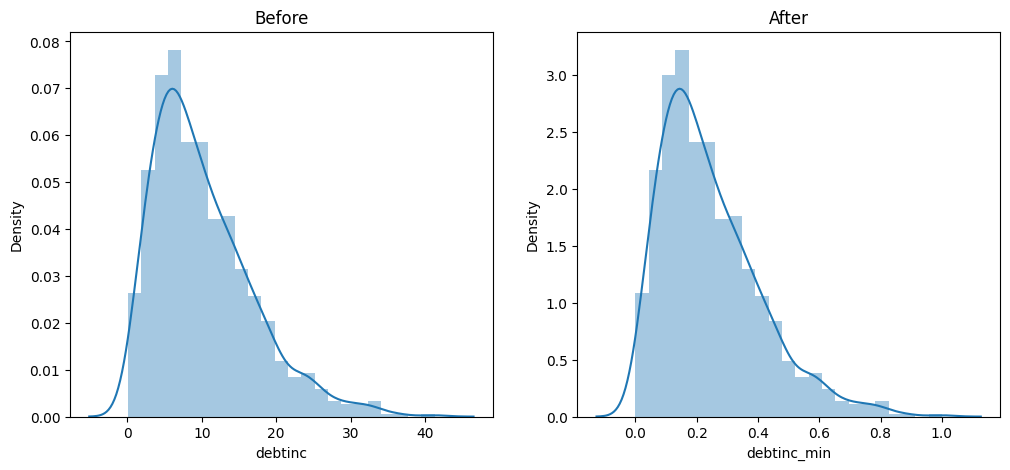

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset['debtinc'])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset['debtinc_min'])

plt.show()